In [1]:
import os
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
homedir = "/home/bandheyh/common/survival-LCS-telo"
sys.path.append(homedir)
from sLCS import survivalLCS

In [3]:
model, nfeat, maf, censoring, cv = 'het', 'f10000', 'maf0.4', '0.1', '0'

In [4]:
objects = []
with (open('../pipeline/pickled_cv_models/'+model+'/'+model+'_'+nfeat+'_'+maf+'/cens_'+censoring+'/ExSTraCS_'+cv, "rb")) as file:
    while True:
        try:
            objects.append(pickle.load(file))
        except EOFError:
            break

In [5]:
trainedModel = objects[0]
trainedModel.export_iteration_tracking_data("../output/iterationData.csv")

In [6]:
iterationData = pd.read_csv("../output/iterationData.csv")
display(iterationData.head())

,Iteration,Accuracy (approx),Average Population Generality,Macropopulation Size,Micropopulation Size,Match Set Size,Correct Set Size,Average Iteration Age of Correct Set Classifiers,# Classifiers Subsumed in Iteration,# Crossover Operations Performed in Iteration,...,Total Mutation Time,Total Attribute Tracking Time,Total Expert Knowledge Time,Total Model Initialization Time,Total Classifier Add Time,Total Rule Compaction Time,Total Deletion Time,Total Subsumption Time,Total Selection Time,Total Evaluation Time
0,0,0.926096,0.0,1,1,1,1,0.0,0,0,...,0.0,0.029484,0.0,11.086983,0.017002,0.0,0.000001,0.0,0.0,0.000042
1,1,0.950826,0.0,2,2,1,1,1.0,0,0,...,0.0,0.032604,0.0,11.086983,0.019034,0.0,0.000002,0.0,0.0,0.000075
2,2,0.963020,0.0,2,2,1,1,1.0,0,0,...,0.0,0.036048,0.0,11.086983,0.019034,0.0,0.000003,0.0,0.0,0.000088
3,3,0.956894,0.0,2,2,2,1,1.0,0,0,...,0.0,0.039202,0.0,11.086983,0.019034,0.0,0.000003,0.0,0.0,0.000103
4,4,0.908676,0.0,3,3,2,1,4.0,0,0,...,0.0,0.042318,0.0,11.086983,0.019773,0.0,0.000003,0.0,0.0,0.000115


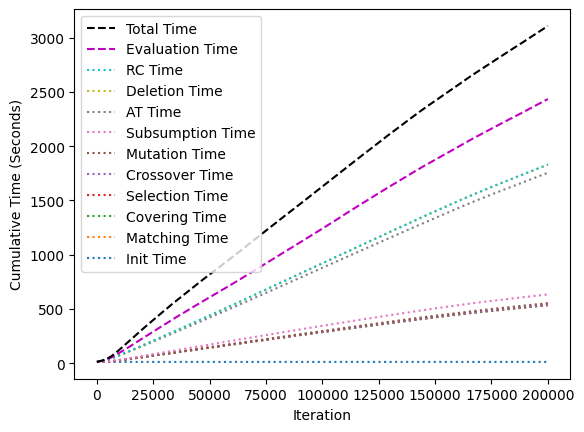

In [44]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("../output/iterationData.csv")

iterations = dataTracking["Iteration"].values
gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
covTime = dataTracking["Total Covering Time"].values
crossTime = dataTracking["Total Crossover Time"].values
covTime = dataTracking["Total Covering Time"].values
mutTime = dataTracking["Total Mutation Time"].values
atTime = dataTracking["Total Attribute Tracking Time"].values
initTime = dataTracking["Total Model Initialization Time"].values
rcTime = dataTracking["Total Rule Compaction Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

color_list = [None,'tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','m','k']
plt.plot(iterations,initTime,label="Init Time", linestyle=':',color=color_list[1])
plt.plot(iterations,mTime+initTime,label="Matching Time",linestyle=':',color=color_list[2])
plt.plot(iterations,covTime+mTime+initTime,label="Covering Time",linestyle=':',color=color_list[3])
plt.plot(iterations,selTime+covTime+mTime+initTime,label="Selection Time",linestyle=':',color=color_list[4])
plt.plot(iterations,crossTime+selTime+covTime+mTime+initTime,label="Crossover Time",linestyle=':',color=color_list[5])
plt.plot(iterations,mutTime+crossTime+selTime+covTime+mTime+initTime,label="Mutation Time",linestyle=':',color=color_list[6])
plt.plot(iterations,subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Subsumption Time",linestyle=':',color=color_list[7])
plt.plot(iterations,atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="AT Time",linestyle=':',color=color_list[8])
plt.plot(iterations,delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Deletion Time",linestyle=':',color=color_list[9])
plt.plot(iterations,rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="RC Time",linestyle=':',color=color_list[10])
plt.plot(iterations,evalTime+rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Evaluation Time",linestyle='--',color=color_list[11])
plt.plot(iterations,gTime,label="Total Time",linestyle='--',color=color_list[12])
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Seconds)')
handles, labels = plt.gca().get_legend_handles_labels()
max_values = [np.max(line.get_ydata()) for line in handles]
sorted_indices = np.argsort(max_values)[::-1]
sorted_handles = [handles[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]
plt.legend(sorted_handles, sorted_labels)
plt.savefig('../output/Figure4.png', dpi=600)
plt.show()